In [1]:
import sys
sys.path.append('..')
%matplotlib notebook
from matplotlib import pyplot as plt


In [2]:
import APT_interface as apt
import os
import PoseUNet_resnet as PoseUNet
import tensorflow as tf
tf.reset_default_graph()
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
view = 1
conf = apt.create_conf(lbl_file, view, 'conf','/tmp',net_type='umdn')
conf.cachedir = '/nrs/branson/mayank/apt_cache/stephen_view{}'.format(view)

conf.normalize_img_mean = False
conf.dl_steps = 20000
self = PoseUNet.PoseUMDN_resnet(conf)
self.min_dist = 0
self.train_umdn(restore=False)
import tensorflow as tf
tf.reset_default_graph()
V = self.classify_val()
res = np.array([
    [ 7.24539496,  7.8049516 ,  7.97217146,  8.44032115,  7.69838612],
    [ 8.76899118,  9.63168685,  9.55280912, 10.26671805,  9.54993247],
    [10.91299409, 12.02790342, 11.79002365, 13.02997551, 11.82780871],
    [12.50440241, 15.64563049, 13.13194025, 14.71218933, 13.96273946]])

/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
Using TensorFlow backend.


Label file is in v7.3 format. Loading using h5py
Val DB exists: Data for validation from:/nrs/branson/mayank/apt_cache/stephen_view1/val_TF.tfrecords
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Not loading pose_umdn variables. Initializing them
-- Loading from pretrained --
resnet_model/conv2d/kernel:0
resnet_model/batch_normalization/gamma:0
resnet_model/batch_normalization/beta:0
resnet_model/batch_normalization/moving_mean:0
resnet_model/batch_normalization/moving_variance:0
resnet_model/conv2d_1/kernel:0
resnet_model/conv2d_2/kernel:0
resnet_model/batch_normalization_1/gamma:0
resnet_model/batch_normalization_1/beta:0
resnet_model/batch_normalization_1/moving_mean:0
resnet_model/batch_normalization_1/moving_variance:0
resnet_model/conv2d_3/kernel:0
resnet_model/batch_normalization_2/gamma:0
resnet_model/batch_normalization_2/beta:0
resnet_model/batch_normalization_2/moving_mean:0
resnet_model/batch_normalization_2/moving_variance:0
resnet_model/conv2d_4/kernel:0
resnet_model/batch_normalization_3/gamma:0
resnet_model/batch_normalization_3/beta:0
resnet_model/batch_normalization_3/moving_mean:0
resnet_model/batch_normalization_3/moving_variance:0
resnet_model/conv2d_5/kern

INFO:tensorflow:Restoring parameters from /groups/branson/bransonlab/mayank/APT/deepnet/pretrained/resnet_v2_fp32_savedmodel_NHWC/1538687283/variables/variables


INFO:tensorflow:Restoring parameters from /groups/branson/bransonlab/mayank/APT/deepnet/pretrained/resnet_v2_fp32_savedmodel_NHWC/1538687283/variables/variables
/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Time required to train: 20.9043269157
val_dist:296.97 step:0.00 train_dist:252.04 train_loss:491.95 val_loss:549.06 
Saved state to /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-0
Time required to train: 42.6359081268
val_dist:103.93 step:50.00 train_dist:56.75 train_loss:185.93 val_loss:211.54 
Time required to train: 33.7692530155
val_dist:99.29 step:100.00 train_dist:29.77 train_loss:138.02 val_loss:167.08 
Time required to train: 34.0804829597
val_dist:90.83 step:150.00 train_dist:47.60 train_loss:131.50 val_loss:139.51 
Time required to train: 34.0020978451
val_dist:96.16 step:200.00 train_dist:35.23 train_loss:105.71 val_loss:137.69 
Time required to train: 34.0637919903
val_dist:60.45 step:250.00 train_dist:36.22 train_loss:97.42 val_loss:86.04 
Time required to train: 33.9213130474
val_dist:49.98 step:300.00 train_dist:26.30 train_loss:80.33 val_loss:70.87 
Time required to train: 33.8916950226
val_dist:47.23 step:350.00 train_dist:23.80 train_loss:61.67 val_loss:65.5

val_dist:6.46 step:3500.00 train_dist:5.09 train_loss:16.86 val_loss:10.97 
Time required to train: 33.9556472301
val_dist:9.37 step:3550.00 train_dist:4.86 train_loss:11.90 val_loss:14.63 
Time required to train: 33.841272831
val_dist:6.44 step:3600.00 train_dist:8.72 train_loss:24.57 val_loss:10.75 
Time required to train: 33.9653890133
val_dist:6.45 step:3650.00 train_dist:7.09 train_loss:18.60 val_loss:10.85 
Time required to train: 33.909981966
val_dist:8.94 step:3700.00 train_dist:8.02 train_loss:22.76 val_loss:14.17 
Time required to train: 34.0251049995
val_dist:5.11 step:3750.00 train_dist:7.97 train_loss:18.47 val_loss:8.96 
Time required to train: 33.8868350983
val_dist:4.75 step:3800.00 train_dist:4.89 train_loss:14.57 val_loss:8.52 
Time required to train: 33.9990229607
val_dist:8.55 step:3850.00 train_dist:4.49 train_loss:13.38 val_loss:14.01 
Time required to train: 33.998073101
val_dist:5.31 step:3900.00 train_dist:4.28 train_loss:11.87 val_loss:9.33 
Time required to t

val_dist:7.18 step:7050.00 train_dist:7.85 train_loss:20.14 val_loss:11.90 
Time required to train: 33.8909800053
val_dist:5.14 step:7100.00 train_dist:3.42 train_loss:8.42 val_loss:9.21 
Time required to train: 33.9086019993
val_dist:3.77 step:7150.00 train_dist:5.81 train_loss:13.23 val_loss:6.89 
Time required to train: 33.9555630684
val_dist:4.65 step:7200.00 train_dist:4.48 train_loss:9.48 val_loss:8.38 
Time required to train: 33.9203338623
val_dist:7.08 step:7250.00 train_dist:4.30 train_loss:9.77 val_loss:12.01 
Time required to train: 33.9662539959
val_dist:5.35 step:7300.00 train_dist:5.06 train_loss:11.69 val_loss:9.47 
Time required to train: 33.9653871059
val_dist:4.36 step:7350.00 train_dist:4.66 train_loss:11.02 val_loss:7.72 
Time required to train: 34.0018498898
val_dist:5.91 step:7400.00 train_dist:4.82 train_loss:14.78 val_loss:10.14 
Time required to train: 33.9377889633
val_dist:5.34 step:7450.00 train_dist:4.38 train_loss:9.96 val_loss:9.69 
Time required to train

Time required to train: 33.9110379219
val_dist:7.66 step:10650.00 train_dist:5.18 train_loss:12.62 val_loss:12.69 
Time required to train: 33.8310711384
val_dist:4.81 step:10700.00 train_dist:4.66 train_loss:10.98 val_loss:8.89 
Time required to train: 33.8867528439
val_dist:3.83 step:10750.00 train_dist:6.53 train_loss:15.86 val_loss:7.16 
Time required to train: 33.7176680565
val_dist:6.22 step:10800.00 train_dist:3.55 train_loss:8.38 val_loss:10.75 
Time required to train: 33.9846739769
val_dist:4.67 step:10850.00 train_dist:3.99 train_loss:9.41 val_loss:8.38 
Time required to train: 33.77760005
val_dist:3.48 step:10900.00 train_dist:3.69 train_loss:8.94 val_loss:6.82 
Time required to train: 33.918047905
val_dist:5.45 step:10950.00 train_dist:3.51 train_loss:8.23 val_loss:9.66 
Time required to train: 33.7898640633
val_dist:4.08 step:11000.00 train_dist:6.00 train_loss:12.41 val_loss:7.59 
Time required to train: 33.7941651344
val_dist:4.33 step:11050.00 train_dist:4.59 train_loss:

Time required to train: 33.7592830658
val_dist:5.87 step:14200.00 train_dist:3.97 train_loss:10.02 val_loss:10.43 
Time required to train: 33.9564819336
val_dist:4.86 step:14250.00 train_dist:3.22 train_loss:7.66 val_loss:8.88 
Time required to train: 33.9038980007
val_dist:3.60 step:14300.00 train_dist:2.59 train_loss:6.62 val_loss:6.69 
Time required to train: 34.0633859634
val_dist:5.13 step:14350.00 train_dist:4.75 train_loss:10.26 val_loss:9.08 
Time required to train: 33.9870331287
val_dist:3.35 step:14400.00 train_dist:3.99 train_loss:8.95 val_loss:6.82 
Time required to train: 33.930150032
val_dist:4.14 step:14450.00 train_dist:7.62 train_loss:18.80 val_loss:7.50 
Time required to train: 34.0221459866
val_dist:5.35 step:14500.00 train_dist:4.41 train_loss:9.66 val_loss:9.50 
Time required to train: 33.9745619297
val_dist:5.05 step:14550.00 train_dist:3.50 train_loss:7.88 val_loss:9.07 
Time required to train: 33.9043269157
val_dist:3.74 step:14600.00 train_dist:3.37 train_loss:

Time required to train: 33.9297499657
val_dist:3.72 step:17800.00 train_dist:9.10 train_loss:18.97 val_loss:7.07 
Time required to train: 34.0879640579
val_dist:3.54 step:17850.00 train_dist:3.76 train_loss:9.24 val_loss:6.68 
Time required to train: 33.9628539085
val_dist:5.76 step:17900.00 train_dist:3.49 train_loss:7.72 val_loss:10.07 
Time required to train: 33.9952988625
val_dist:4.65 step:17950.00 train_dist:3.34 train_loss:7.84 val_loss:8.46 
Time required to train: 33.8790040016
val_dist:4.83 step:18000.00 train_dist:3.27 train_loss:8.34 val_loss:8.20 
Saved state to /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-18000
Time required to train: 41.5667870045
val_dist:4.64 step:18050.00 train_dist:2.72 train_loss:6.97 val_loss:8.39 
Time required to train: 33.9093871117
val_dist:4.57 step:18100.00 train_dist:4.62 train_loss:10.76 val_loss:8.28 
Time required to train: 33.9849889278
val_dist:4.81 step:18150.00 train_dist:4.61 train_loss:10.61 val_loss:8.34 
Time required t

INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-20000


Parameters that do not match for /nrs/branson/mayank/apt_cache/stephen_view1/traindata:
att_layers doesnt match
brange doesnt match
crange doesnt match
mdn_groups doesnt match
next doesnt match
op_affinity_graph doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
set_exp_name doesnt match


In [4]:
import APT_interface as apt
import os
import PoseUNet_resnet as PoseUNet
import tensorflow as tf
tf.reset_default_graph()
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
view = 1
conf = apt.create_conf(lbl_file, view, 'conf','/tmp',net_type='umdn')
conf.cachedir = '/nrs/branson/mayank/apt_cache/stephen_view{}'.format(view)

conf.normalize_img_mean = False
conf.batch_size = 1
conf.dl_steps = 40000
self = PoseUNet.PoseUMDN_resnet(conf)
self.min_dist = 0

self.setup_train()
self.pred = self.create_network()
def loss(inputs, pred):
    in_locs = inputs[1]
    # mdn_loss = self.my_loss(pred, inputs[1])
    mdn_loss = self.l2_loss(pred, in_locs)
    unet_loss = tf.sqrt(tf.nn.l2_loss(inputs[-1]-self.unet_pred))/self.conf.label_blur_rad/self.conf.n_classes
    dist_loss = self.dist_loss()/10
    return mdn_loss + unet_loss + dist_loss

self.cost = loss(self.inputs, self.pred)
optimizer = tf.train.AdamOptimizer(
    learning_rate=self.ph['learning_rate'])

gradients, variables = zip(*optimizer.compute_gradients(self.cost))
self.create_saver()
training_iters = self.conf.dl_steps

sess = tf.Session()
start_at = self.init_restore_net(sess, do_restore=True)


dv = []
dg = []
for ndx,v in enumerate(variables):
    if v.name.find('dist')>0:
        print v.name
        dv.append(v)
        dg.append(gradients[ndx])

all_g = []
for g in dg:
    all_g.append([])

all_m = []    
all_w = []
all_d = []
all_i = []
all_l = []

val_file = os.path.join(self.conf.cachedir, self.conf.valfilename + '.tfrecords')
num_val = 0
for _ in tf.python_io.tf_record_iterator(val_file):
    num_val += 1
train_file = os.path.join(self.conf.cachedir, self.conf.trainfilename + '.tfrecords')
num_train = 0
for _ in tf.python_io.tf_record_iterator(val_file):
    num_train += 1

for step in range(num_val / self.conf.batch_size):
    self.fd_val()
    curg, cur_pred, cur_input = sess.run([dg,self.pred,self.inputs],self.fd)
    for ndx,g in enumerate(curg):
        all_g[ndx].append(g)
    all_m.append(cur_pred[0])
    all_d.append(cur_pred[3])
    all_w.append(cur_pred[2])
    all_i.append(cur_input[0])
    all_l.append(cur_input[1])
        
train_g = []
for g in dg:
    train_g.append([])

train_m = []    
train_w = []
train_d = []
train_i = []
train_l = []

for step in range(num_val / self.conf.batch_size):
    self.fd_train()
    curg, cur_pred, cur_input = sess.run([dg,self.pred,self.inputs],self.fd)
    for ndx,g in enumerate(curg):
        train_g[ndx].append(g)
    train_m.append(cur_pred[0])
    train_d.append(cur_pred[3])
    train_w.append(cur_pred[2])
    train_i.append(cur_input[0])
    train_l.append(cur_input[1])
        
def grad_reshape(in_a,n_val):
    in_a = np.array(in_a)
    return in_a.reshape((n_val,-1))

out_g = []
for g in all_g:
    out_g.append(grad_reshape(g,num_val))
out_tg = []
for g in train_g:
    out_tg.append(grad_reshape(g,num_train))


def val_reshape(in_a):
    in_a = np.array(in_a)
    return in_a.reshape((-1,) + in_a.shape[2:])

all_m = val_reshape(all_m)    
all_d = val_reshape(all_d)    
all_w = val_reshape(all_w)    
all_i = val_reshape(all_i)    
all_l = val_reshape(all_l)    
    
train_m = val_reshape(train_m)    
train_d = val_reshape(train_d)    
train_w = val_reshape(train_w)    
train_i = val_reshape(train_i)    
train_l = val_reshape(train_l)    


Label file is in v7.3 format. Loading using h5py
Val DB exists: Data for validation from:/nrs/branson/mayank/apt_cache/stephen_view1/val_TF.tfrecords
INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-22000


INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-22000


 ---- 
Continuing training from iter number 22001
 ---- 
Parameters that do not match for /nrs/branson/mayank/apt_cache/stephen_view1/traindata:
att_layers doesnt match
batch_size doesnt match
brange doesnt match
crange doesnt match
mdn_groups doesnt match
next doesnt match
op_affinity_graph doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
set_exp_name doesnt match
pose_umdn/dist/layer_dist/weights:0
pose_umdn/dist/layer_dist/biases:0
pose_umdn/dist/layer_dist/BatchNorm/beta:0
pose_umdn/dist/weights_dist:0
pose_umdn/dist/biases_dist:0


<IPython.core.display.Javascript object>


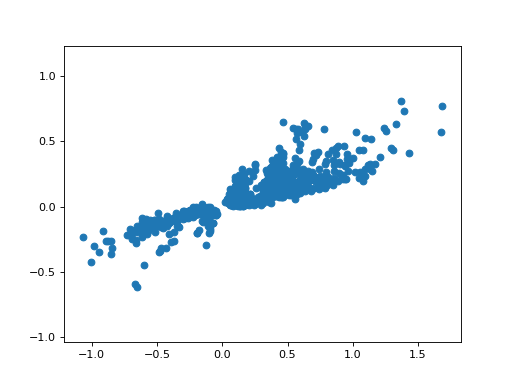

(-1.2117697958023317,
 1.8272812131912475,
 -0.6919959468500956,
 0.8886198682444437)

In [5]:
ex = 1238
pp = []
for ndx in [0,3]:
    curp = np.dot(out_g[ndx][ex,:],out_tg[ndx].T)
    mag = np.dot(out_g[ndx][ex,:],out_g[ndx][ex:(ex+1),:].T)
    pp.append(curp/mag)

plt.figure()
plt.scatter(pp[1],pp[0])
plt.axis('equal')

(4,)


<IPython.core.display.Javascript object>


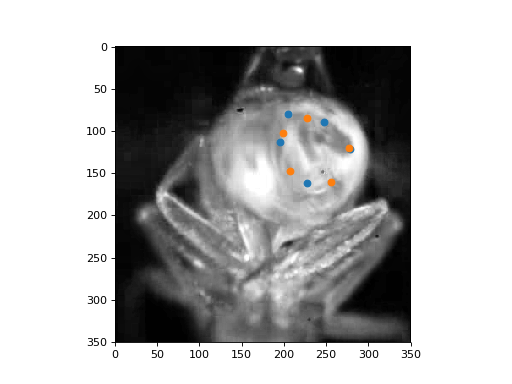

<IPython.core.display.Javascript object>


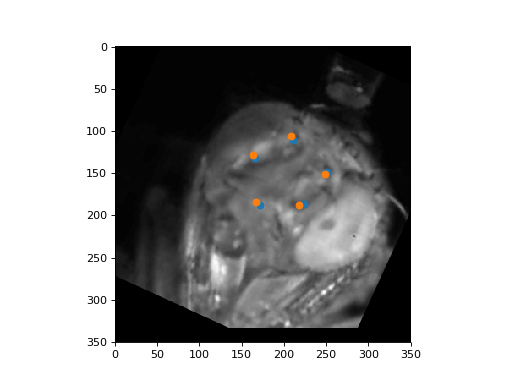

1238 [ 1.2840947  37.13918925 20.28341533 23.32596004 28.65381954] [5.88367748 4.97537947 5.19373894 4.6055932  5.20422745]
300 [6.75183523 3.55975487 3.31711418 5.77917739 6.36431665] [7.71379423 6.40517998 6.82341433 6.0854373  6.64457846]


In [16]:
rr = np.where(pp[0]<-0.40)[0]
print rr.shape
tx = np.random.choice(rr)
pred_locs = np.zeros([1371,5,2])
pred_dist = np.zeros([num_val,5])
for ndx in range(all_m.shape[0]):
    ii = np.argmax(all_w[ndx,:,0])
    pred_locs[ndx,...] = all_m[ndx,ii,...]*self.offset
    pred_dist[ndx,:] = all_d[ndx,ii,:]*self.offset
train_locs = np.zeros([num_train,5,2])
train_dist = np.zeros([num_train,5])
for ndx in range(train_m.shape[0]):
    ii = np.argmax(train_w[ndx,:,0])
    train_locs[ndx,...] = train_m[ndx,ii,...]*self.offset
    train_dist[ndx,:] = train_d[ndx,ii,:]*self.offset
dd = np.sqrt(np.sum((pred_locs-all_l)**2,axis=-1))
ddt = np.sqrt(np.sum((train_locs-train_l)**2,axis=-1))

plt.figure()    
plt.imshow(all_i[ex,:,:,0],'gray')
plt.scatter(pred_locs[ex,:,0],pred_locs[ex,:,1])
plt.scatter(all_l[ex,:,0],all_l[ex,:,1])
plt.figure()    
plt.imshow(train_i[tx,:,:,0],'gray')
plt.scatter(train_locs[tx,:,0],train_locs[tx,:,1])
plt.scatter(train_l[tx,:,0],train_l[tx,:,1])
print ex,dd[ex,:],pred_dist[ex,:]
print tx,ddt[tx,:],train_dist[tx,:]

<IPython.core.display.Javascript object>


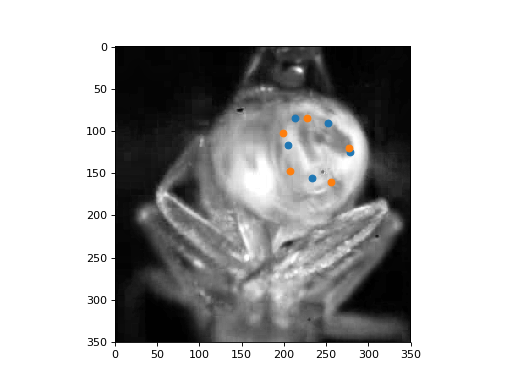

[ 4.47503859 30.7709109  25.07695927 22.76924332 22.58855685]


In [37]:
pred_locs = np.zeros([1371,5,2])
for ndx it range(all_m.shape[0]):
    ii = np.argmax(all_w[ndx,:,0])
    pred_locs[ndx,...] = all_m[ndx,ii,...]*self.offset
dd = np.sqrt(np.sum((pred_locs-all_l)**2,axis=-1))
rr = np.where(np.any(dd>20,axis=1))[0]
ex = np.random.choice(rr)
plt.figure()    
plt.imshow(all_i[ex,:,:,0],'gray')
plt.scatter(pred_locs[ex,:,0],pred_locs[ex,:,1])
plt.scatter(all_l[ex,:,0],all_l[ex,:,1])
print ex,dd[ex,:]

<IPython.core.display.Javascript object>


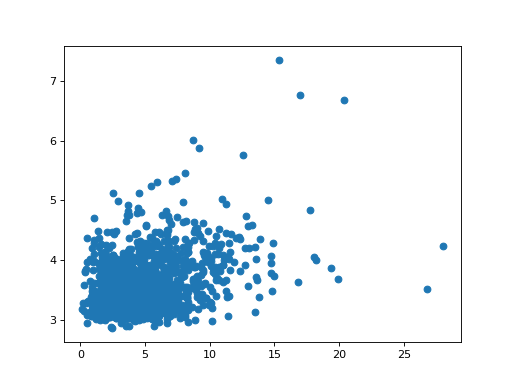

<IPython.core.display.Javascript object>


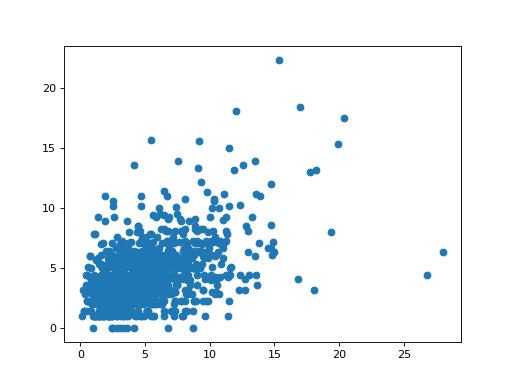

<IPython.core.display.Javascript object>


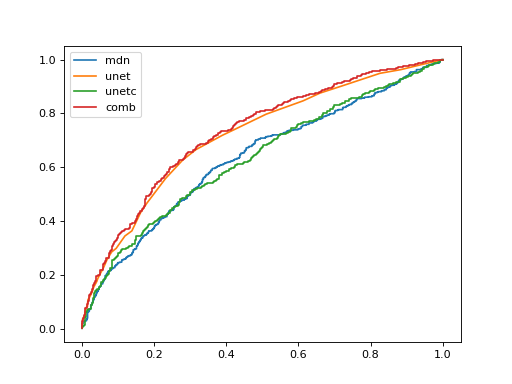

<IPython.core.display.Javascript object>


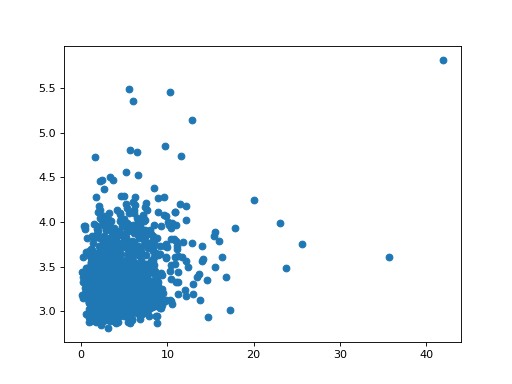

<IPython.core.display.Javascript object>


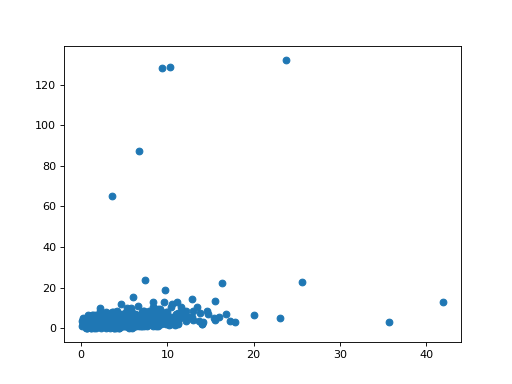

<IPython.core.display.Javascript object>


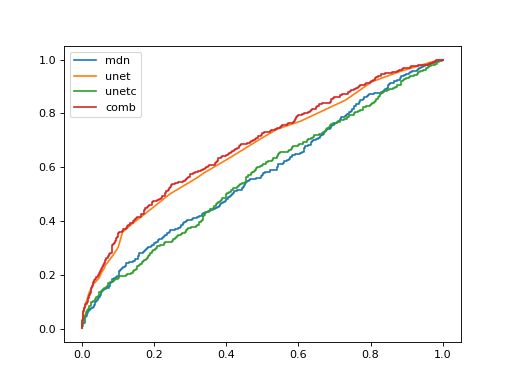

<IPython.core.display.Javascript object>


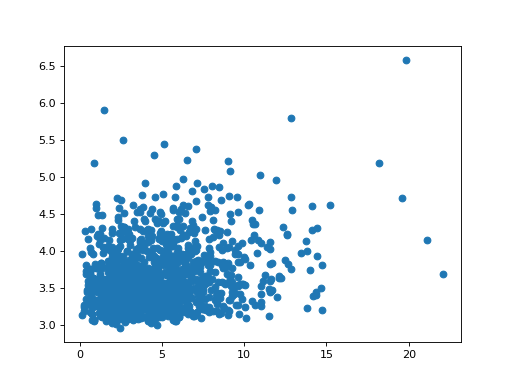

<IPython.core.display.Javascript object>


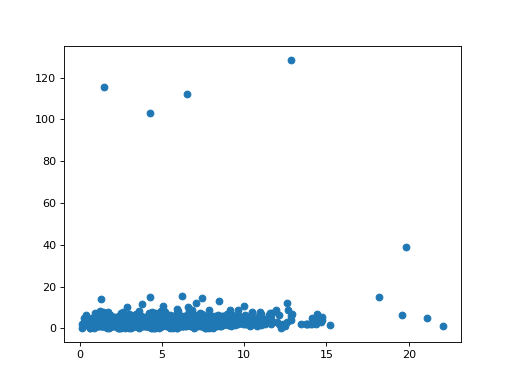

<IPython.core.display.Javascript object>


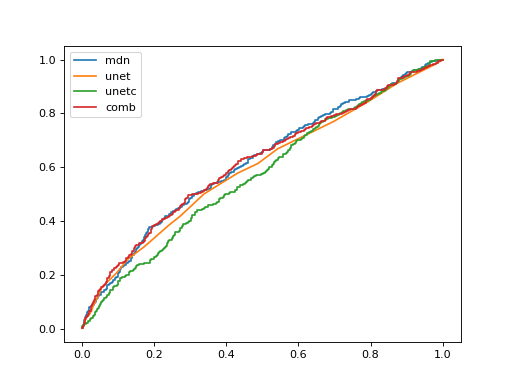

<IPython.core.display.Javascript object>


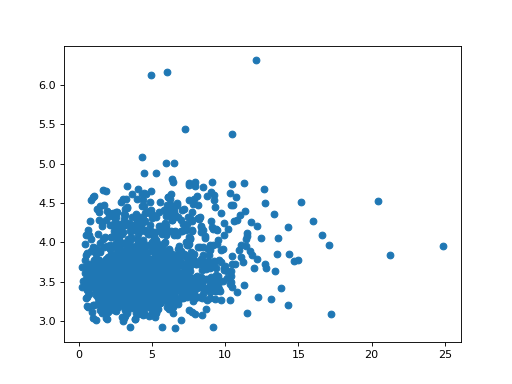

<IPython.core.display.Javascript object>


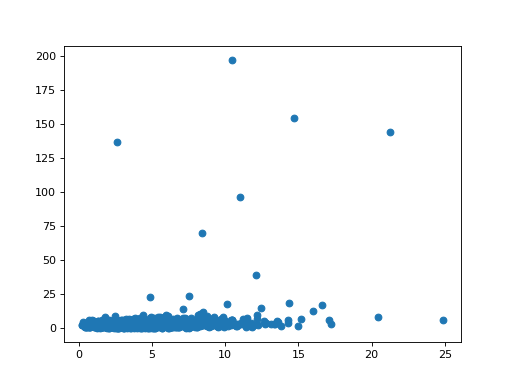

<IPython.core.display.Javascript object>


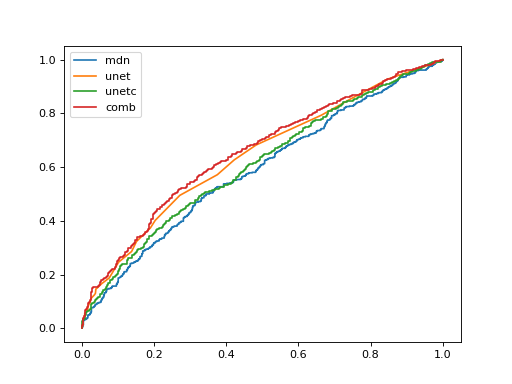

<IPython.core.display.Javascript object>


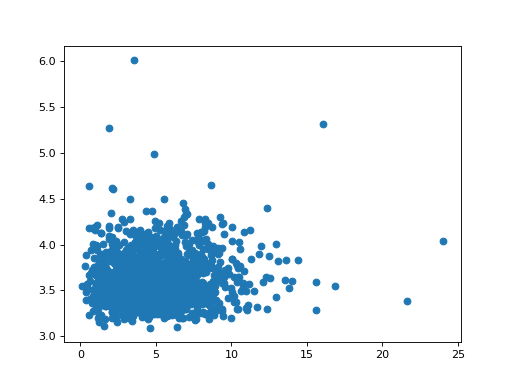

<IPython.core.display.Javascript object>


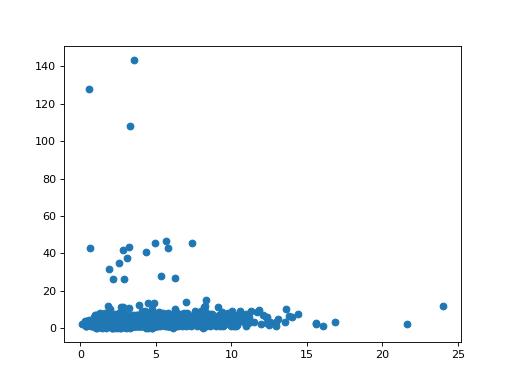

<IPython.core.display.Javascript object>


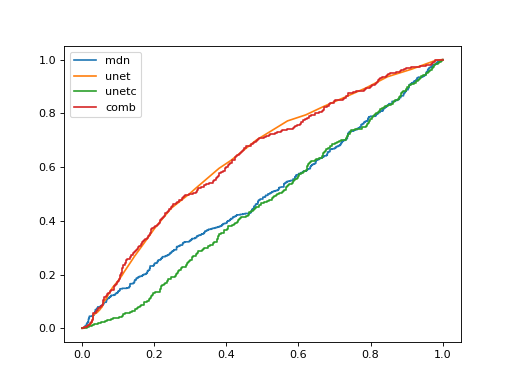

In [3]:
unet_pred = V[6][-1]
mdn_pred = V[3]
locs = V[4]
xx = V[5][3]*self.offset
ii = np.argmax(V[5][2],axis=1)
mdn_conf = np.zeros([xx.shape[0],5])
for ndx in range(V[5][0].shape[0]):
    for pt in range(conf.n_classes):
        mdn_conf[ndx,pt] = xx[ndx,ii[ndx,0],pt]

dd = np.sqrt(np.sum((locs-mdn_pred)**2,axis=-1))
dd_unet = np.sqrt(np.sum((locs-unet_pred)**2,axis=-1))
dd_unet_mdn = np.sqrt(np.sum((mdn_pred-unet_pred)**2,axis=-1))
unet_conf = np.max(V[6][0],axis=(1,2))
pos = dd > 5; # self.min_dist;#self.min_dist
for pt in range(5):
    from sklearn.metrics import roc_curve, auc
    fpr_mdn,tnr_mdn,_ = roc_curve(pos[:,pt],mdn_conf[:,pt])
    fpr_unet, tnr_unet,_ = roc_curve(pos[:,pt], dd_unet_mdn[:,pt])
    fpr_unetc, tnr_unetc,_ = roc_curve(pos[:,pt], -unet_conf[:,pt])
    # dd_comb = np.maximum(dd_unet_mdn,mdn_conf)
    dd_comb = dd_unet_mdn+mdn_conf

    fpr_comb, tnr_comb,_ = roc_curve(pos[:,pt], dd_comb[:,pt])

    from matplotlib import pyplot as plt
    plt.figure()
    plt.scatter(dd[:,pt],mdn_conf[:,pt])
    plt.figure()
    plt.scatter(dd[:,pt],dd_unet_mdn[:,pt])

    plt.figure()
    plt.plot(fpr_mdn,tnr_mdn)
    plt.plot(fpr_unet,tnr_unet)
    plt.plot(fpr_unetc,tnr_unetc)
    plt.plot(fpr_comb,tnr_comb)
    plt.legend(['mdn','unet','unetc','comb'])

<IPython.core.display.Javascript object>


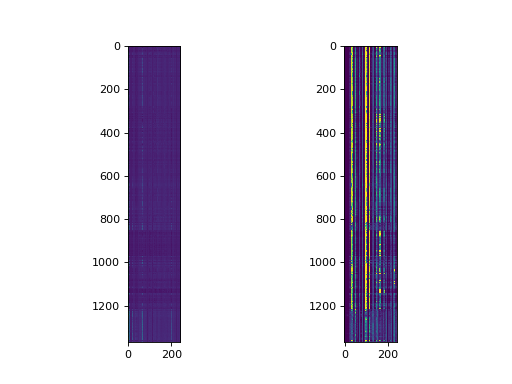

In [5]:
f,ax = plt.subplots(1,2)
ax[0].imshow(V[5][2][:,:,0])
ax[1].imshow(xx[:,:,0])

<IPython.core.display.Javascript object>


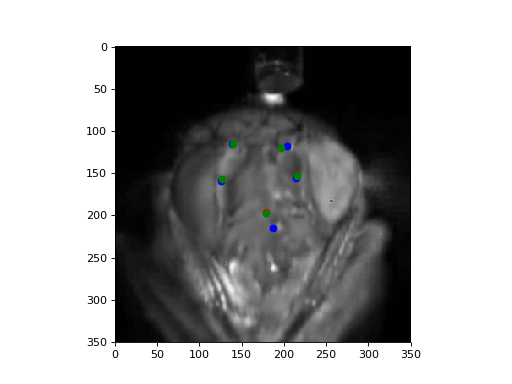

In [48]:
unet_pred = V[6][-1]
mdn_pred = V[3]
locs = V[4]
xx = V[5][3]*self.offset
ii = np.argmax(V[5][2],axis=1)
mdn_conf = np.zeros([xx.shape[0],5])
for ndx in range(V[5][0].shape[0]):
    for pt in range(conf.n_classes):
        mdn_conf[ndx,pt] = xx[ndx,ii[ndx,0],pt]

dd = np.sqrt(np.sum((locs-mdn_pred)**2,axis=-1))
dd_unet = np.sqrt(np.sum((locs-unet_pred)**2,axis=-1))
dd_unet_mdn = np.sqrt(np.sum((mdn_pred-unet_pred)**2,axis=-1))

tt = np.where((dd_unet_mdn[:,pt]<15) & (dd[:,pt]>15))[0]
t = np.random.choice(tt)
plt.figure()
plt.imshow(V[1][t,:,:,0],'gray')
plt.scatter(V[3][t,pt,0],V[3][t,pt,1],c='r')
plt.scatter(V[4][t,:,0],V[4][t,:,1],c='b')
plt.scatter(V[-1][1][t,:,0],V[-1][1][t,:,1],c='g')

In [2]:
import APT_interface as apt
import os
import PoseUNet_resnet as PoseUNet
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
view = 1
conf = apt.create_conf(lbl_file, view, 'conf','/tmp',net_type='umdn')
conf.cachedir = '/nrs/branson/mayank/apt_cache/stephen_view{}'.format(view)

conf.normalize_img_mean = False
self = PoseUNet.PoseUMDN_resnet(conf)
V = self.classify_val()

unet_pred = V[6][-1]
mdn_pred = V[3]
locs = V[4]

dd = np.sqrt(np.sum((locs-mdn_pred)**2,axis=-1))
dd_unet = np.sqrt(np.sum((locs-unet_pred)**2,axis=-1))
print np.percentile(dd_unet,[90,95,98,99],axis=0)
print np.percentile(dd,[90,95,98,99],axis=0)

print np.percentile(dd_unet,[90,95,98,99],axis=0)
print np.percentile(dd,[90,95,98,99],axis=0)
res = np.array([
    [ 7.24539496,  7.8049516 ,  7.97217146,  8.44032115,  7.69838612],
    [ 8.76899118,  9.63168685,  9.55280912, 10.26671805,  9.54993247],
    [10.91299409, 12.02790342, 11.79002365, 13.02997551, 11.82780871],
    [12.50440241, 15.64563049, 13.13194025, 14.71218933, 13.96273946]])


/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
Using TensorFlow backend.


Label file is in v7.3 format. Loading using h5py
--- Loading the model by reconstructing the graph ---
Val DB exists: Data for validation from:/nrs/branson/mayank/apt_cache/stephen_view1/val_TF.tfrecords
INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-20000


INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-20000


Parameters that do not match for /nrs/branson/mayank/apt_cache/stephen_view1/traindata:
att_layers doesnt match
brange doesnt match
crange doesnt match
mdn_groups doesnt match
next doesnt match
op_affinity_graph doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
set_exp_name doesnt match


/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


NameError: name 'dd_unet' is not defined

In [33]:
xx = V[5][3]*self.offset
ii = np.argmax(V[5][2],axis=1)
mdn_conf = np.zeros([xx.shape[0],5])
for ndx in range(V[5][0].shape[0]):
    for pt in range(conf.n_classes):
        mdn_conf[ndx,pt] = xx[ndx,ii[ndx,0],pt]
print ii[0,0]
print xx[0,:60,3]
print xx[0,ii[0,0],3]


55
[ 9.298799   12.747728    6.042777    9.606519    6.6533823   7.467092
  5.5706263  11.621324    7.899725   11.857707    9.907374   12.198003
  9.9061775  11.7503     10.079491   10.9115505   9.950369    9.999434
 10.187527   12.192032   13.952575   17.468046    8.794188   11.05299
  4.2538085   9.136014    3.851725    6.1698914   2.017513    9.685445
  0.68033695  1.4060578   0.74732643  0.8640908   1.961831    2.36485
  5.0722957   7.405776    8.336989   12.372884    6.981296    8.642883
 10.045459   10.706343    7.2463493  10.825022    3.7300982   8.569102
  4.735906    5.8995566   2.8973486   7.396016    0.14262523  0.21622416
  0.06920955  0.0854256   0.6780676   0.91219217  2.8714948   3.1725168 ]
0.0854256


In [40]:
wt = V[5][2]
wt.sum(axis=1).shape
conf.mdn_logit_eps_training

0.001

In [11]:
import APT_interface as apt
import os
import PoseUNet_resnet as PoseUNet
import PoseCommon_dataset as PoseCommon
import tensorflow as tf
tf.reset_default_graph()
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
view = 1
conf = apt.create_conf(lbl_file, view, 'conf','/tmp',net_type='umdn')
conf.cachedir = '/nrs/branson/mayank/apt_cache/stephen_view{}'.format(view)

conf.normalize_img_mean = False
self = PoseUNet.PoseUMDN_resnet(conf)
self.setup_train()
self.pred = self.create_network()

locs_offset = self.offset
mdn_locs, mdn_scales, mdn_logits, mdn_dist = self.pred
y = self.inputs[1]
cur_comp = []
ll = tf.nn.softmax(mdn_logits, axis=1)
logit_eps = self.conf.mdn_logit_eps_training
ll = tf.cond(self.ph['phase_train'], lambda: ll + logit_eps, lambda: tf.identity(ll))
ll = ll / tf.reduce_sum(ll, axis=1, keepdims=True)
ll = tf.stop_gradient(ll)
for cls in range(self.conf.n_classes):
    pp = y[:, cls:cls + 1, :]/locs_offset
    kk = tf.sqrt(tf.reduce_sum(tf.square(pp - mdn_locs[:, :, cls, :]), axis=2))
    # kk is the distance between all predictions for point cls from the labels.
    kk = tf.clip_by_value(kk-self.min_dist/locs_offset/self.conf.rescale,0,self.max_dist/locs_offset/self.conf.rescale)
    kk = tf.stop_gradient(kk)
    dd = tf.abs(kk-mdn_dist[:,:,cls])
    cur_comp.append(dd)

self.create_saver()
sess = tf.Session()
self.restore(sess)
PoseCommon.initialize_remaining_vars(sess)
self.fd_val()
aa,bb = sess.run([self.pred[3],cur_comp],self.fd)

Label file is in v7.3 format. Loading using h5py
Val DB exists: Data for validation from:/nrs/branson/mayank/apt_cache/stephen_view1/val_TF.tfrecords
INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-20000


INFO:tensorflow:Restoring parameters from /nrs/branson/mayank/apt_cache/stephen_view1/umdn_resnet-20000


In [22]:
aa,bb,mm = sess.run([self.pred[3],cur_comp,self.pred[3]],self.fd)

In [17]:
bb[0][0][:30]*self.offset

array([ 0.6515198 ,  3.1410465 , 13.829709  ,  8.2176285 , 10.878743  ,
        6.2116137 ,  2.418213  ,  4.867483  ,  2.3674507 ,  2.5534716 ,
        5.322053  ,  0.30003262,  1.748106  ,  1.6550283 ,  0.38037968,
        4.872119  ,  3.9076986 ,  2.1366568 ,  4.170846  ,  1.2844162 ,
        0.586195  ,  5.8814545 ,  4.053787  ,  5.8625555 ,  1.991816  ,
        6.740428  ,  1.0854721 ,  7.6695075 ,  5.2795324 ,  4.7578444 ],
      dtype=float32)

In [21]:
aa[0,:30,0]*self.offset

array([17.721376 , 16.554857 , 10.436397 , 10.352047 , 10.890937 ,
       11.26839  , 10.575951 , 10.452974 ,  8.901889 , 10.882664 ,
       10.502702 , 10.535811 , 10.110493 , 11.805501 ,  9.927218 ,
       11.760728 , 10.111466 , 12.229548 , 13.369441 , 15.624998 ,
       15.105118 , 17.573639 , 11.068026 , 12.243683 ,  7.516701 ,
       10.30331  ,  4.7094126,  8.124786 ,  2.845495 ,  3.4883027],
      dtype=float32)

In [25]:
cc = np.zeros([8,5])
for ndx in range(8):
    for pt in range(conf.n_classes):
        ii = np.argmax(mm[0,:,pt])
        cc[ndx,pt] = aa[ndx,ii,pt]
print cc*self.offset

[[19.2884407  19.57516098 15.93872452 17.14339447 16.65244675]
 [18.21786308 15.83625221 17.26263046 14.71265793 13.74574471]
 [20.00293922 21.2678566  14.99579144 15.18502808 17.77764893]
 [20.25611305 20.55866051 15.76236248 11.39813709 17.88450623]
 [19.52408028 20.64190674 15.04546928 11.31496906 17.71166039]
 [20.01996994 24.93858337 15.99489975  9.58162212 18.91306686]
 [20.08364677 24.39937782 14.90878201  9.99090576 19.01002502]
 [20.32097244 18.30854607 16.170578   13.60282326 15.6273737 ]]


In [7]:
print np.percentile(dd_unet,[90,95,98,99],axis=0)
print np.percentile(dd,[90,95,98,99],axis=0)

[[ 6.31068871  6.75739563  6.99228671  7.24185787  6.48893331]
 [ 8.12490726  8.24108395  8.84533099  9.34320483  8.18307597]
 [10.45877418 11.27727121 11.11950543 11.87305317 11.50941056]
 [12.67702188 13.72833299 12.99434709 13.7508234  13.55935994]]
[[ 7.39309084  8.09937123  7.96239657  8.64065012  7.72869632]
 [ 9.18773862  9.7212426   9.76919664 10.7443935   9.39510666]
 [12.84479992 12.98865958 12.42827369 12.53182414 12.31962676]
 [14.79389951 16.8604757  14.32442373 16.13470044 14.88330199]]


In [6]:
print np.percentile(dd_unet,[90,95,98,99],axis=0)
print np.percentile(dd,[90,95,98,99],axis=0)

[[ 6.2650801   6.44133591  7.2716423   7.43149066  6.467179  ]
 [ 8.14636249  7.67141652  9.03144874  9.18875361  8.11211852]
 [10.43670044 10.81150501 11.86175338 11.63273347 11.13160288]
 [12.23646716 14.07157262 13.00592164 13.21272918 13.25572587]]
[[ 7.32953368  7.7130192   7.83723315  8.32562312  7.99742588]
 [ 9.33153157  9.48571737  9.63018752  9.86685479  9.50493876]
 [11.61519581 11.75973097 11.60181865 12.36214509 11.8830837 ]
 [13.72715534 14.25819923 13.64923388 14.07234778 13.54380309]]


In [9]:
self.plot_results()

ValueError: No variables to save

In [20]:
print np.percentile(dd_unet,[90,95,98,99],axis=0)
print np.percentile(dd,[90,95,98,99],axis=0)

[[ 6.35497955  6.53639003  7.25052485  7.57479015  6.59181672]
 [ 8.14826377  8.37931623  8.98823049  9.46260795  8.11365781]
 [10.86665349 10.52318166 11.26455288 11.83654888 11.61075021]
 [11.99799597 14.15159822 12.69311464 13.43781192 13.56866455]]
[[ 7.14397077  8.04089071  7.91739663  8.23749285  7.81872267]
 [ 8.79277761  9.67603854  9.70918342 10.23378373  9.77334636]
 [11.13284783 12.70755074 11.58184273 12.72021503 12.34072692]
 [13.31698716 16.01256733 13.67119257 15.7393345  13.53403191]]


<IPython.core.display.Javascript object>


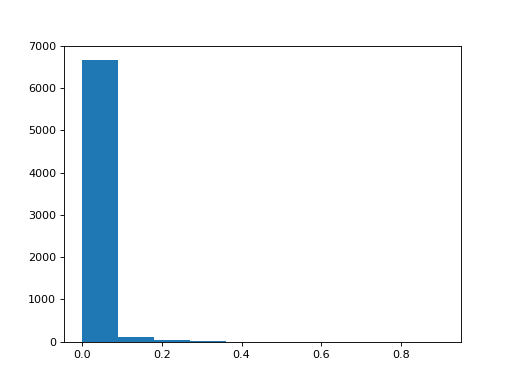

(array([6.658e+03, 1.190e+02, 3.700e+01, 1.600e+01, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([7.52850319e-04, 9.10452401e-02, 1.81337630e-01, 2.71630020e-01,
        3.61922410e-01, 4.52214799e-01, 5.42507189e-01, 6.32799579e-01,
        7.23091969e-01, 8.13384358e-01, 9.03676748e-01]),
 <a list of 10 Patch objects>)

In [24]:
plt.figure()
plt.hist(mdn_conf.flatten())

<IPython.core.display.Javascript object>


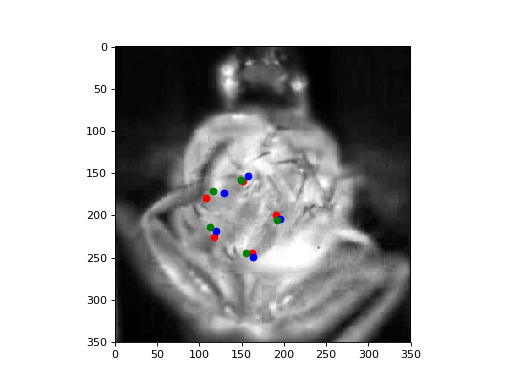

In [19]:
tt = np.where((dd[:,pt]>20) & (mdn_conf[:,pt]<0.1))[0]
t = np.random.choice(tt)
plt.figure()
plt.imshow(V[1][t,:,:,0],'gray')
plt.scatter(V[3][t,:,0],V[3][t,:,1],c='r')
plt.scatter(V[4][t,:,0],V[4][t,:,1],c='b')
plt.scatter(V[-1][1][t,:,0],V[-1][1][t,:,1],c='g')

In [7]:
default_net_name = 'deepnet'
# lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
lbl_file = '/groups/branson/bransonlab/apt/experiments/data/sh_trn4879_gtcomplete_cacheddata_dlstripped.lbl'
crop_size = [[230,350],[350,350]]
# name = 'stephen_20181029'
cache_dir = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache'
model_type = 'mdn'
from trackStephenHead_KB import update_conf
import APT_interface as apt
import PoseUNet_resnet as PoseURes
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
cur_name = 'stephen_20181115'
view = 1
conf = apt.create_conf(lbl_file,view=view,name=cur_name,cache_dir=cache_dir,net_type=model_type)
update_conf(conf)
tf.reset_default_graph()
self = PoseURes.PoseUMDN_resnet(conf, name='deepnet')
self.train_data_name = 'traindata'
V = self.classify_val(onTrain=True)
print np.percentile(V[0],[90,95,98,99],axis=0)

Label file is in v7.3 format. Loading using h5py
--- Loading the model by reconstructing the graph ---
Val DB does not exists: Data for validation from:/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/train_TF.tfrecords
INFO:tensorflow:Restoring parameters from /groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/deepnet-20000


INFO:tensorflow:Restoring parameters from /groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/deepnet-20000


Parameters that do not match for /groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/traindata:
att_layers doesnt match
brange doesnt match
crange doesnt match
mdn_groups doesnt match
next doesnt match
op_affinity_graph doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
set_exp_name doesnt match


/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


MemoryError: 

In [ ]:
default_net_name = 'deepnet'
crop_reg_file = '/groups/branson/bransonlab/mayank/stephen_copy/crop_regression_params.mat'
# lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
lbl_file = '/groups/branson/bransonlab/apt/experiments/data/sh_trn4879_gtcomplete_cacheddata_dlstripped.lbl'
crop_size = [[230,350],[350,350]]
# name = 'stephen_20181029'
cache_dir = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache'
model_type = 'mdn'
from trackStephenHead_KB import update_conf
import APT_interface as apt
import PoseUNet_resnet as PoseURes
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
cur_name = 'stephen_20181102_newlabels'
view = 1
conf = apt.create_conf(lbl_file,view=view,name=cur_name,cache_dir=cache_dir,net_type=model_type)
tf.reset_default_graph()
self = PoseURes.PoseUMDN_resnet(conf, name='deepnet')
self.train_data_name = 'traindata'
V1 = self.classify_val(onTrain=True)
print np.percentile(V1[0],[90,95,98,99],axis=0)

In [2]:
import sys
sys.path.append('..')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
tf.reset_default_graph()
from poseConfig import aliceConfig as conf
conf.cachedir += '_moreeval'
conf.use_unet_loss = True
conf.batch_size = 32
conf.labelfile = '/groups/branson/bransonlab/mayank/PoseTF/data/alice/multitarget_bubble_expandedbehavior_20180425_local.lbl'

/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
import pickle
with open('/groups/branson/bransonlab/mayank/PoseTF/cache/alice_moreeval/rnn_pp.p','r') as f:
    X = pickle.load(f)
from matplotlib import pyplot as plt

In [4]:
print len(X[0]),len(X[1])

2826 3290


In [17]:
import PoseTools
Y = PoseTools.json_load('/groups/branson/bransonlab/mayank/PoseTF/cache/alice_moreeval/splitdata.json')


In [24]:
print len(Y[0]),len(Y[1])

1413 3290


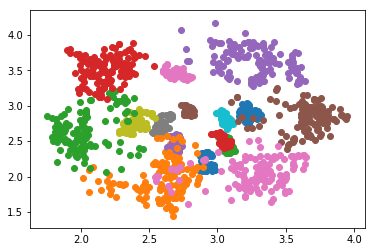

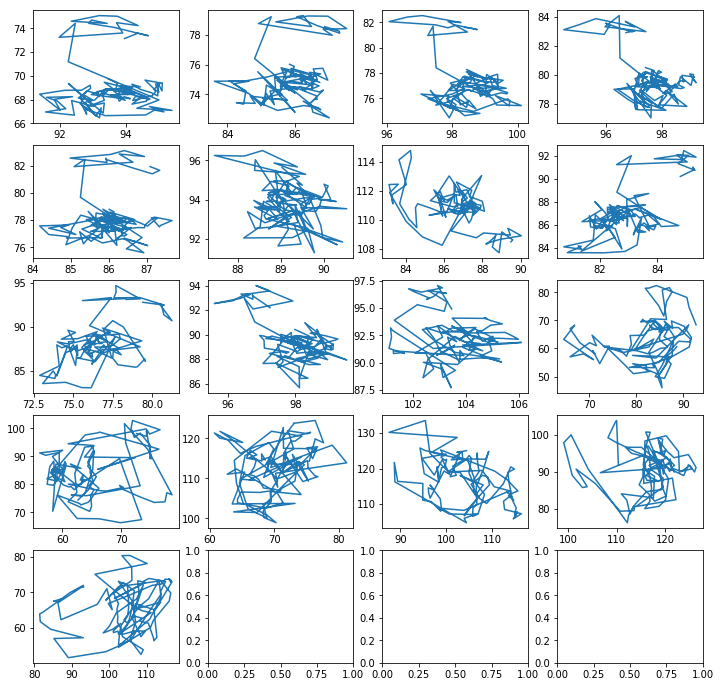

In [8]:
ndx = np.random.randint(len(X[0]))
rr = X[0][ndx][0]
for pt in range(17):
    plt.scatter(rr[:,pt,0],rr[:,pt,1])
f,ax = plt.subplots(5,4,figsize=(12,12))    
ax = ax.flatten()
for pt in range(17):
    ax[pt].plot(rr[:,pt,0]*32,rr[:,pt,1]*32)

In [ ]:
        net = PoseUNet_resnet.PoseUMDN_resnet(self.conf,self.mdn_name)
        sess, _ = net.restore_net_common(net.create_network)

        conf = self.conf
        on_gt = False
        db_files = ()
        if split_file is not None:
            predefined = PoseTools.json_load(split_file)
            split = False
        else:
            predefined = None

        mov_split = None

        local_dirs, _ = multiResData.find_local_dirs(conf, on_gt=False)
        lbl = h5py.File(conf.labelfile, 'r')
        view = conf.view
        flipud = conf.flipud
        npts_per_view = np.array(lbl['cfg']['NumLabelPoints'])[0, 0]
        sel_pts = int(view * npts_per_view) + conf.selpts

        out_fns = [True, False]
        data = [[],[]]
        count = 0


In [9]:
import sys
sys.path.append('..')
sys.path.append('/groups/branson/home/kabram/bransonlab/coco/cocoapi/PythonAPI')
%matplotlib inline
from matplotlib import pyplot as plt

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [10]:
from pycocotools.coco import COCO

In [4]:
import PoseTools

/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


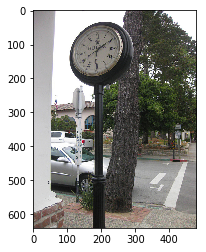

In [3]:
import imageio
ii = imageio.imread('/groups/branson/bransonlab/mayank/coco/train2017/000000000064.jpg')
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(ii)

In [5]:
import pawData
reload(pawData)
import myutils
reload(myutils)
pawData.createDB()

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


IOError: [Errno 2] No such file or directory: '/home/mayank/Dropbox/AdamVideos/M118_M119_M122_M127_M130_M173_M174_M147_20150615.mat'

In [6]:
kk = np.zeros([3,5,2])
kk[:,:,:] = np.nan
print kk
np.any(np.isnan(kk),axis=(0,1))

[[[ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]]

 [[ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]]

 [[ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]]]


array([ True,  True], dtype=bool)

In [ ]:
import sys
sys.path.append('/home/mayank/work/pyutils')
sys.path.append('/home/mayank/work/tensorflow')
import pawMulti
reload(pawMulti)
import myutils
reload(myutils)
import pawconfig
reload(pawconfig)
import multiPawTools
reload(multiPawTools)


pawMulti.train()

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import pawconfig as conf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint
from multiPawTools import scalepatches


L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']
    


In [ ]:
frames = np.where(expid[0,:]==4)[0]
fnum = ts[0,frames]
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
print(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES,1)
stat,framein1 = cap.read()
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES,2)
stat,framein2 = cap.read()
framein1 = framein1.astype('float')
framein2 = framein2.astype('float')
ddff = framein1-framein2
ddff = np.abs(ddff).astype('uint8')
print(stat)
if stat:
    plt.imshow(ddff)

print(ddff.max())    
cap.release()

In [ ]:
import myutils
reload(myutils)
import cv2
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
ff = myutils.readframe(cap,1998)
print(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT ))
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, 1998)
print(cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES))
stat,ff = cap.read()
print(cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES))
print(stat)

In [ ]:
import moviepy.video.io.ffmpeg_reader as freader
reader = freader.FFMPEG_VideoReader('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
f1 = reader.get_frame((-2.-0.1)/reader.fps)
f2 = reader.get_frame((1.-0.1)/reader.fps)
fe = reader.get_frame((1998.-0.1)/reader.fps)
type(f1)


In [ ]:
import cv2
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/movie_comb.avi')
          


In [ ]:
import pawconfig as conf
import scipy.io as sio
reload(conf)
L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']
expid[0,3]

In [ ]:
import lmdb
env = lmdb.open('cacheHead/val_lmdb', readonly=True)
txn = env.begin()
print(env.stat())

In [ ]:
env.close()

In [ ]:
import caffe
import numpy as np
import re
import matplotlib.pyplot as plt
import pawData
reload(pawData)
cursor =txn.cursor()
cursor.first()

In [ ]:
import multiPawTools
reload(multiPawTools)
import pawconfig as conf
img,locs = multiPawTools.readLMDB(cursor,3,1)

In [ ]:
from scipy import misc
from scipy import ndimage
reload(multiPawTools)
reload(conf)
plt.gray()
ndx = 2
img = img.transpose([0,2,3,1])
plt.imshow(img[ndx,:,:,0])
plt.show()

blurL = multiPawTools.createLabelImages(locs,conf.imsz,conf.rescale*conf.pool_scale,
                                        conf.label_blur_rad,1)
x0 = multiPawTools.scaleImages(img,conf.rescale)
x1 = multiPawTools.scaleImages(x0,conf.scale)
x2 = multiPawTools.scaleImages(x1,conf.scale)
# labels = np.zeros([img.shape[2]/4,img.shape[3]/4])
# labels[int(locs[ndx][1])/4,int(locs[ndx][0])/4] = 1
# blurL = ndimage.gaussian_filter(labels,sigma = 3)
# blurL = blurL/blurL.max()
plt.imshow(blurL[ndx,:,:,0])
plt.show()
plt.imshow(x2[ndx,:,:,0])
plt.show()
print(blurL.max(),blurL.min())

In [ ]:
print(blurL[ndx,5:12,35:42,0])

In [ ]:
print(blurL.shape)

In [ ]:
from scipy import misc
sz = img.shape
scale =2
simg = np.zeros((sz[0],sz[1],sz[2]/scale,sz[3]/scale))
for ndx in range(sz[0]):
    for chn in range(sz[1]):
        simg[ndx,chn,:,:] = misc.imresize(img[ndx,chn,:,:],1./scale)
plt.gray()        
plt.imshow(simg[1,0,:,:])        
plt.show()
plt.imshow(img[1,0,:,:])        
plt.show()

In [ ]:
env.close()

In [ ]:
import pawMulti
reload(pawMulti)
import pawconfig as conf
reload(conf)
import tensorflow as tf

imsz = conf.imsz
x0 = tf.placeholder(tf.float32, [None, imsz[0],imsz[1],1])
x1 = tf.placeholder(tf.float32, [None, imsz[0]/2,imsz[1]/2,1])
x2 = tf.placeholder(tf.float32, [None, imsz[0]/4,imsz[1]/4,1])
dropout = tf.placeholder(tf.float32)
labelimg = tf.placeholder(tf.float32, [None, imsz[0]/4,imsz[1]/4,1])

weights = pawMulti.initNetConvWeights()
pred = pawMulti.paw_net_multi_conv(x0,x1,x2,weights,dropout)

In [ ]:
import numpy as np
imsz = conf.imsz
jj = np.ones([3,imsz[0],imsz[1],1])
jj1 = np.ones([3,imsz[0]/2,imsz[1]/2,1])
jj2 = np.ones([3,imsz[0]/4,imsz[1]/4,1])
sess.run(tf.initialize_all_variables())
out = sess.run(pred,feed_dict = {x0:jj,x1:jj1,x2:jj2,labelimg:jj2,dropout:1.})
print(out.shape)
print(jj2.shape)

In [ ]:
sess = tf.InteractiveSession()


In [ ]:
import tensorflow as tf
import numpy as np
x0 = tf.placeholder(tf.float32,[3,4])

jj = np.arange(12).reshape([2,3,2])
indices0 = tf.range(0,2*tf.shape(x0)[1],2)
indices1 = tf.range(1,2*tf.shape(x0)[1],2)
indices2 = tf.range(0,2*tf.shape(x0)[2],2)
indices3 = tf.range(1,2*tf.shape(x0)[2],2)

x1 = tf.transpose(tf.dynamic_stitch([indices0,indices1],[x0,x0]),[1,0])
x2 = tf.transpose(tf.dynamic_stitch([indices2,indices3],[x1,x1]),[1,0])

sess.run(tf.initialize_all_variables())
out = sess.run([x1,x2],feed_dict={x0:jj})
print(jj)
print(out[1])

In [ ]:
sess.close()

In [ ]:
import tensorflow as tf

import os,sys
sys.path.append('/home/mayank/work/caffe/python')

import caffe
import lmdb
import caffe.proto.caffe_pb2
import pawconfig as conf

from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import multiPawTools
import math
import pawMulti

learning_rate = conf.learning_rate
training_iters = conf.training_iters
batch_size = conf.batch_size
display_step = conf.display_step

# Network Parameters
n_input = conf.psz
n_classes = conf.n_classes # 
dropout = conf.dropout # Dropout, probability to keep units
imsz = conf.imsz
# tf Graph input
keep_prob = tf.placeholder(tf.float32) # dropout(keep probability)

x0 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.rescale,
                                 imsz[1]/conf.rescale,1])
x1 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.rescale,1])
x2 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.scale/conf.rescale,1])

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))
y = tf.placeholder(tf.float32, [None, lsz0,lsz1,n_classes])

lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, map_size=conf.map_size)
valenv = lmdb.open(vallmdbfilename, map_size=conf.map_size)
txn = env.begin(write=True)
valtxn = valenv.begin(write=True)
train_cursor = txn.cursor()
val_cursor = valtxn.cursor()
weights = pawMulti.initNetConvWeights()

# Construct model
pred =pawMulti.paw_net_multi_conv(x0,x1,x2, weights, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.l2_loss(pred- y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()
saver = tf.train.Saver()

sess = tf.InteractiveSession()

sess.run(init)

saver.restore(sess, 'cache/pawMulti_r2_s3_20000.ckpt')
 

val_xs, locs = multiPawTools.readLMDB(val_cursor,batch_size*4,n_classes)
x0_in = multiPawTools.scaleImages(val_xs.transpose([0,2,3,1]),conf.rescale)
x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
labelims = multiPawTools.createLabelImages(locs,
                           conf.imsz,conf.pool_scale*conf.rescale,
                           conf.label_blur_rad,1)
out = sess.run([pred,cost], feed_dict={x0:x0_in,
                                 x1:x1_in,
                                 x2:x2_in,
                           y: labelims, keep_prob: 1.})

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import time
plt.ion()
fig,axs = plt.subplots(1,3)
plt.gray()
for ndx in range(256):
    plt.sca(axs[0])
    plt.imshow(x0_in[ndx,:,:,0])
    display.clear_output(wait=True)
#     display.display(plt.gcf())
    plt.sca(axs[1])
    plt.imshow(out[0][ndx,:,:,0])
    display.clear_output(wait=True)
#     display.display(plt.gcf())
    plt.sca(axs[2])
    plt.imshow(labelims[ndx,:,:,0])
    display.clear_output(True)
    display.display(fig)
    time.sleep(1)

In [ ]:
import cv2
import matplotlib.animation as manimation
sys.path.append('/home/mayank/work/pyutils')
import myutils
import matplotlib
import tempfile


curdir = '/home/mayank/Dropbox/AdamVideos/multiPoint/M122_20140828/M122_20140828_v002'
tdir = tempfile.mkdtemp()
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# FFMpegWriter = manimation.writers['mencoder_file']
# writer = FFMpegWriter(fps=15,bitrate=2000)

fig = plt.figure()

cap = cv2.VideoCapture(os.path.join(curdir,'movie_comb.avi'))
nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
count = 0
vidfilename = 'paw_detect.avi'
for fnum in range(nframes):
    plt.clf()
    framein = myutils.readframe(cap,fnum)
    framein = framein[np.newaxis,:,0:(framein.shape[1]/2),0:1]
    x0_in = multiPawTools.scaleImages(framein,conf.rescale)
    x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
    x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
    labelim = np.zeros([1,33,44,1])
    out = sess.run(pred, feed_dict={x0:x0_in,
                     x1:x1_in,
                     x2:x2_in,
                     y:labelim,
                     keep_prob: 1.})
    plt.imshow(x0_in[0,:,:,0])
    maxndx = np.argmax(out[0,:,:,0])
    loc = np.unravel_index(maxndx,out.shape[1:3])
    plt.scatter(loc[1]*4,loc[0]*4,hold=True)

    fname = "test_{:06d}.png".format(count)
    plt.savefig(os.path.join(tdir,fname))
    count+=1
#     plt.imshow(out[0,:,:,0])
#     fname = "test_heat_{:d}.png".format(fnum)
#     plt.savefig(fname)

#         writer.grab_frame()

ffmpeg_cmd = "ffmpeg -r 30 " + \
"-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

tfilestr = os.path.join(tdir,'test_*.png')
mencoder_cmd = "mencoder mf://" + tfilestr + \
" -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
vidfilename + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
print(mencoder_cmd)
os.system(mencoder_cmd)
cap.release()


In [ ]:
import pawData
a,b,c = pawData.loadValdata()

In [ ]:
import pawData
import pawMulti
import scipy.io as sio
import pawconfig as conf
reload(pawMulti)
reload(conf)
import os
import numpy as np
import tensorflow as tf
import tempfile
import matplotlib.pyplot as plt
import cv2
import sys,copy
sys.path.append('/home/mayank/work/pyutils')
import myutils


isval,localdirs,seldirs = pawData.loadValdata()
model_file = 'cache/pawMulti_r2_s3_20000.ckpt'
movcount = 0
maxcount = 5
L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']

pred,saver,pholders = pawMulti.initPredSession()
tdir = tempfile.mkdtemp()

plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
fig = plt.figure()

with tf.Session() as sess:
    saver.restore(sess, model_file)
    for ndx,dirname in enumerate(localdirs):
        if movcount> maxcount:
            break
        if not seldirs[ndx]:
            continue

        expname = os.path.basename(dirname)
        frames = np.where(expid[0,:] == (ndx + 1))[0]
        curdir = localdirs[ndx]
        outmovie = expname + ".avi"
        cap = cv2.VideoCapture(os.path.join(curdir,'movie_comb.avi'))
        nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))

        count = 0
        for fnum in range(nframes):
            plt.clf()
            plt.axis('off')
            framein = myutils.readframe(cap,fnum)
            framein = framein[:,0:(framein.shape[1]/2),0:1            out = pawMulti.predict(copy.copy(framein),sess,pred,pholders)
            plt.imshow(framein[:,:,0])
            maxndx = np.argmax(out[0,:,:,0])
            loc = np.unravel_index(maxndx,out.shape[1:3])
            scalefactor = conf.rescale*conf.pool_scale
            plt.scatter(loc[1]*scalefactor,loc[0]*scalefactor,hold=True)

            fname = "test_{:06d}.png".format(count)
            plt.savefig(os.path.join(tdir,fname))
            count+=1

    #     ffmpeg_cmd = "ffmpeg -r 30 " + \
    #     "-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

        tfilestr = os.path.join(tdir,'test_*.png')
        mencoder_cmd = "mencoder mf://" + tfilestr + \
        " -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
        outmovie + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
    #     print(mencoder_cmd)
        os.system(mencoder_cmd)
        cap.release()

        movcount+=1

In [ ]:
import tensorflow as tf

sess = tf.InteractiveSession()

kk = tf.constant([3,-2,0.1,-0.05,5])
ss = tf.sign(kk)
mm = tf.mul(ss,tf.maximum(tf.abs(kk)-0.2,0))
aa = mm.eval()
print(aa)

In [ ]:
import lmdb
lmdbfilename= 'cacheHeadSide/train_lmdb'
env = lmdb.open(lmdbfilename, readonly = True)


txn = env.begin()
print(txn.stat()['entries'])

In [ ]:
import PoseTools
import multiResData
cursor = txn.cursor()
ii,ll = PoseTools.readLMDB(cursor,1,[512, 512],multiResData)
print ii.shape
print ll
plt.imshow(ii[0,0,:,:])

In [ ]:
import pickle

with open('cacheHead/headMRFtraindata','rb') as f:
    gg = pickle.load(f)
    

In [ ]:
print gg[0].keys()
plt.clf()
x = gg[0]['step_no'][5:]
plt.plot(x,gg[0]['val_base_dist'][5:])
plt.plot(x,gg[0]['val_dist'][5:], hold=True)
plt.legend(('base','mrf'))

In [ ]:
from janLegConfig import conf as conf
# from stephenHeadConfig import sideconf as conf
import PoseTools

jj = PoseTools.initMRFweights(conf)
jj.shape
for ndx in range(conf.n_classes):
    fig = plt.figure()
    for ii in range(conf.n_classes):
        ax1 = fig.add_subplot(2,2,ii+1)
        ax1.imshow(jj[:,:,ndx,ii],interpolation='nearest',vmax=1.,vmin=0.)
    plt.show()
    

In [ ]:
np.set_printoptions(precision=2)
# print jj[35:45,35:45,0,1]
print np.array_str(jj[35:45,35:45,2,3],precision=2,suppress_small = True)

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
a,b,c = multiResData.loadValdata(conf)
print max(int(len(a)/conf.holdoutratio),1)
print len(a)
print a
print a.index(88)

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
isval,a,b = multiResData.loadValdata(conf)
n_ho = min(max(int(len(isval)*conf.holdoutratio),1),len(isval)-1)
print n_ho
print isval.index(73)
print len(isval)

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
reload(multiResData)
_,x = multiResData.getMovieLists(conf)
x

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
import cv2

print cl
_,valmovies = multiResData.getMovieLists(conf)
ndx = -3
cap = cv2.VideoCapture(valmovies[ndx])
height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
orig_crop_loc = conf.cropLoc[(height,width)]
crop_loc = [x/4 for x in orig_crop_loc] 
print orig_crop_loc

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('jet')
rgba = cmap(np.linspace(0,1,4))
print rgba

ii = np.zeros([4,4,3])
for ndx in range(4):
    ii[:,ndx,:] =cm.hsv(0+1./4.*ndx)[0:3]
plt.imshow(ii)    

In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

In [ ]:
import multiResData
from stephenHeadConfig import conf as conf
_,valmovies = multiResData.getMovieLists(conf)

In [ ]:
print valmovies[0][17:]

In [ ]:
# create a list of movies for stephen -- May 23 2016
import os
with open("/groups/branson/bransonlab/mayank/PoseEstimationData/Stephen/folders2track.txt", "r") as text_file:
    movies = text_file.readlines()
movies = [x.rstrip() for x in movies]

import glob
sdir = movies[0::2]    
fdir = movies[1::2]
fmovies = []
smovies = []
for ndx,ff  in enumerate(sdir):
    kk = glob.glob(ff+'/*_c.avi')
    if len(kk) is not 1:
        print ff
        continue
    smovies.append(kk[0])
    kk = glob.glob(fdir[ndx]+'/*_c.avi')
    fmovies += kk
        
print smovies[0:3]
print fmovies[0:3]
print len(smovies)
print len(fmovies)
for ff in smovies+fmovies:
    if not os.path.isfile(ff):
        print ff

In [ ]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

# from stephenHeadConfig import sideconf as conf
# conf.useMRF = False
# extrastr = '_side'
# outtype = 1
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from stephenHeadConfig import conf as conf
conf.useMRF = True
outtype = 2
extrastr = ''
redo = False

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

# _,valmovies = multiResData.getMovieLists(conf)
# for ndx in range(len(valmovies)):
#     valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
# for ndx in [0,3,-3,-1]:
    
# valmovies = ['/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial1/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial2/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial3/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial4/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial1/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial2/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial3/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial4/C002H001S0001/C002H001S0001_c.avi',
#             ]
# for ndx in range(len(valmovies)):
valmovies = fmovies

for ndx in range(len(valmovies)):
    
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/nobackup/branson/mayank/stephenOut/' + oname + extrastr
    
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    if ndx<5:
        PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})

    print "Done prediction for %s" %oname


print pp
print predList[1].shape

In [ ]:
# creating movie for lab talk 20160611

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

# from stephenHeadConfig import sideconf as conf
# conf.useMRF = False
# extrastr = '_side'
# outtype = 1
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from stephenHeadConfig import conf as conf
conf.useMRF = False
outtype = 1
extrastr = ''
redo = False

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

_,valmovies = multiResData.getMovieLists(conf)
for ndx in range(len(valmovies)):
    valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
for ndx in [0,3,-3,-1]:
    
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/nobackup/branson/mayank/stephenOut/forDrosoneuroBase_'+ oname + extrastr
    
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    if ndx<5:
        PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


#     cap = cv2.VideoCapture(valmovies[ndx])
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     orig_crop_loc = conf.cropLoc[(height,width)]
#     crop_loc = [x/4 for x in orig_crop_loc] 
#     end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
#     pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
#     predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

#     predLocs = predList[0]
#     predLocs[:,:,:,0] += orig_crop_loc[1]
#     predLocs[:,:,:,1] += orig_crop_loc[0]
    
#     io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})

    print "Done prediction for %s" %oname




In [ ]:
# Compute Errors for validation.
import os
import localSetup
import PoseTools
import PoseTrain
import caffe
from stephenHeadConfig import conf as conf
import tensorflow as tf
from matplotlib import cm

os.environ['CUDA_VISIBLE_DEVICES'] = '2'

conf.useMRF = True
conf.useAC = False
conf.batch_size = 1;
outtype = 3 
self = PoseTools.createNetwork(conf,outtype)
self.openDBs()

sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)
nval = int(self.valenv.stat()['entries'])

predErr = np.zeros([3,conf.n_classes,2,nval])
with self.valenv.begin() as valtxn:
    self.val_cursor = valtxn.cursor()
    self.val_cursor.first()
    for ndx in range(nval):
        self.feed_dict[self.ph['keep_prob']] = 1.
        self.feed_dict[self.ph['learning_rate']] = 1.
        self.updateFeedDict(self.DBType.Val)
        preds = sess.run([self.basePred,self.mrfPred,self.finePred],feed_dict=self.feed_dict)
        predErr[0,:,:,ndx] = PoseTools.getBaseError(self.locs,preds[0],conf)[0,...]
        mrfErr,fineErr = PoseTools.getFineError(self.locs,preds[1],preds[2],conf)
        predErr[1,:,:,ndx] = mrfErr[0,...]
        predErr[2,:,:,ndx] = fineErr[0,...]
        

gg = np.sqrt( (np.square(predErr[:,:,0,:])+np.square(predErr[:,:,0,:])))
hh = np.mean(gg,2)


with self.valenv.begin() as valtxn:
    self.val_cursor = valtxn.cursor()
    self.val_cursor.first()
    for ndx in range(12):
        self.updateFeedDict(self.DBType.Val)

cc=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes))
xx = self.feed_dict[self.ph['x0']]
ll = self.locs[0,:,:]
fig = plt.figure(figsize = (6,20))

for ii in range(3):
    llb = np.tile(ll[...,np.newaxis],[1,1,predErr.shape[-1]]) + predErr[ii,...]
    ax1 = fig.add_subplot(3,1,ii+1)
    ax1.imshow(xx[0,...,0], cmap=cm.gray)

    for ndx in range(conf.n_classes):
        ax1.scatter(llb[ndx,0,:].flatten(),llb[ndx,1,:].flatten(),c=cc[ndx:ndx+1,:],edgecolors='face',s=5,alpha=1)
    ax1.axis('off')
    ax1.set_title('%.2f'%hh.mean(1)[ii])
fig.savefig('/groups/branson/home/kabram/temp/headValResults.png')

In [ ]:
import multiResData
from stephenHeadConfig import conf as conf

_,valmovies = multiResData.getMovieLists(conf)
f = open('/home/mayank/Dropbox/temp/valfilelist.txt','w')
for ndx in range(40,50):
    f.write('{:}\n'.format(valmovies[ndx]))
f.close()    

In [ ]:
import h5py

L = h5py.File('/home/mayank/temp/romainTest.lbl','r')



In [ ]:
print L.keys()

In [ ]:
print L['movieFilesAll'][0,:]

In [ ]:
print [u''.join(unichr(c) for c in L[L['movieFilesAll'][2][0]])]

In [ ]:
p1 = np.array(L['labeledpos'])
print p1.shape
print p1[0,0]
print L[p1[0,0]]
p2 = np.array(L[p1[0,0]])
print p2.shape
print np.invert( np.isnan(p2[1,:,0:5]))

In [ ]:
curpts = p2
frames = np.where(np.invert( np.isnan(curpts[:,0,0])))[0]
print frames.shape

In [ ]:
for ndx in frames[0:10]:
    print ndx

In [ ]:
xx= np.array(L['cfg']['NumLabelPoints'])
kk= int(xx[0,0]*2) + np.arange(3,7)
gg = p2[:,:,kk]
print gg.shape

In [ ]:
type([1,3,2]) is list

In [3]:
import cv2
import PoseTools
from cvc import cvc
import myutils

moviename = '/home/mayank/Dropbox/MultiViewFlyLegTracking/trackingJun22-11-02/bias_video_cam_2_date_2016_06_22_time_11_02_28_v001.avi'
nfr = 200

aim1 = np.zeros([624,672,3,nfr])
aim2 = np.zeros([624,672,3,nfr])
cap = cv2.VideoCapture(moviename)
for ndx in range(nfr):
    s,i = cap.read()
    aim1[...,ndx] = i
cap.release()

cap,nframes = PoseTools.openMovie(moviename)
for ndx in range(nfr):
    i = myutils.readframe(cap,ndx)
    aim2[...,ndx] = i
cap.release()
print np.array_equal(aim1,aim2)

True


In [4]:
from scipy import misc
misc.imresize()

In [2]:
from romainLegConfig import bottomconf as conf
import PoseTools
reload(PoseTools)

o,d,l = PoseTools.genDistortedImages(conf)

In [4]:
l.shape

(8, 18, 2)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


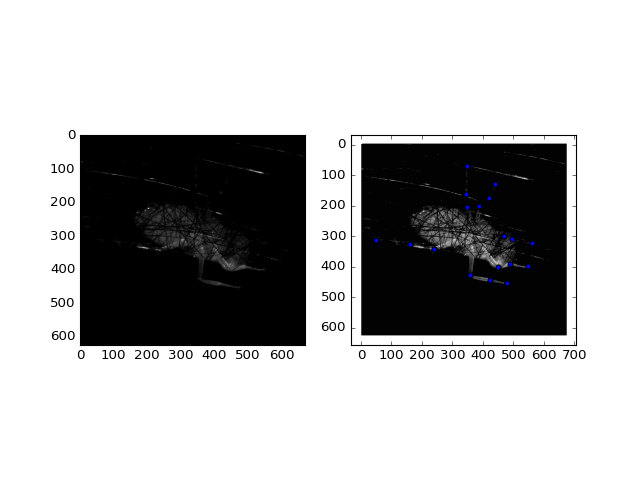

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

In [6]:
%pylab notebook
fig,ax = plt.subplots(1,2)
ax[0].imshow(o[0,0,:,:],cmap='gray')
ax[1].imshow(d[0,...,0],cmap='gray')
ax[1].scatter(l[0,:,0],l[0,:,1])

In [1]:
import tensorflow as tf

x0 = tf.placeholder(tf.float32, [None, 
                                 50,
                                 50,1],name='x0')


In [5]:
print x0.get_shape()[3]

1


In [6]:
vv = [1,2,3]
v1,v2,v3 = vv
print v2

2


In [12]:
xx = np.random.random([5,100,100,1])
yy = np.tile(xx,3)
print yy.shape

(5, 100, 100, 3)
